# $t$ distribution
Author: Aleksander Filip Żarnecki (University of Warsaw)

### (0) Import libraries 

In [1]:
import math
import numpy as np
import matplotlib.pyplot as plt

from scipy.stats import norm
from scipy.stats import t

### (1) Define $t$ experiment

Use standard normal distribution ($\mu=0$, $\sigma=1$) for simplicity


In [2]:
def myt(npt):
    mes = np.random.normal(size=npt)
    mean = np.mean(mes)
    dm = mes - mean
    sigma = np.sqrt(np.sum(dm*dm)/(npt-1)/npt)
    
    return mean/sigma

### (2) Run multiple experiments

In [3]:
# Number of measurement sequences

Ntry = 100000

# Number of measurements in one sequence

Nmes = 2

# Table to collect results

tvec = np.empty(Ntry)

for i in  range(Ntry):
    exp_data = myt(Nmes)
    tvec[i] = exp_data
    

### (3) Plot results

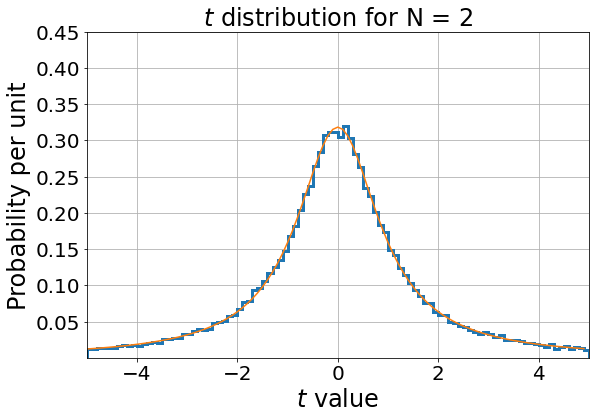

In [4]:
Xmin = -5.0
Xmax = 5.0
Nbin = 100

# Plot histogram

plt.figure(figsize=(9, 6))

# Need to use proper weights to take tails into account (density=True does not!)

wvec = Nbin/Ntry/(Xmax-Xmin)*np.ones(Ntry)
plt.hist(tvec,bins=Nbin, range=[Xmin,Xmax], weights=wvec, density=False, log=False, histtype='step',linewidth=3)

plt.title("$t$ distribution for N = "+str(Nmes),size=24)
plt.xlabel('$t$ value',size=24)
plt.ylabel('Probability per unit',size=24)
plt.xticks(fontsize=20)
plt.yticks(fontsize=20)
plt.xlim([Xmin,Xmax])
plt.ylim([0.0001,0.45])
plt.grid(which='major', axis='both')

# Add expected distribution (scipy function)

def myTfun(x, Ndf):
    return t.pdf(x,Ndf)

xvec = np.arange(Xmin,Xmax,0.1)
fvec = myTfun(xvec,Nmes-1)

plt.plot(xvec,fvec,'-')

# Compare to Gauss distribution

def myGauss(x):
    return norm.pdf(x,0.,1.)

gvec = myGauss(xvec)

# plt.plot(xvec,gvec,'--')

fname = '08_t-dist_'+str(Nmes)+'.png'
plt.savefig(fname)

plt.show()